## Глава 6. Логистическая регресси | Упражнения

По ссылке (https://bit.ly/3imidqa) представлен набор данных с тремя входными 
переменными RED, GREEN и BLUE, которые задают цвет фона в формате RGB, 
а также выходной переменной LIGHT_OR_DARK_FONT_IND, которая прогнозирует, 
какой шрифт лучше подойдет для этого фона — светлый (0) или темный (1).

### 1. Выполните логистическую регрессию на этих данных, используя трехкратную перекрестную валидацию и точность как метрику качества модели.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv('https://bit.ly/3imidqa', delimiter=',')

df.to_csv('data.csv', index=False)

#df.info()
#print(df.head())

X = df.values[:, :-1]
Y = df.values[:, -1]

kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LogisticRegression(penalty=None)

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())
print(results.std())

1.0
0.0


#### Проверка на утечку данных

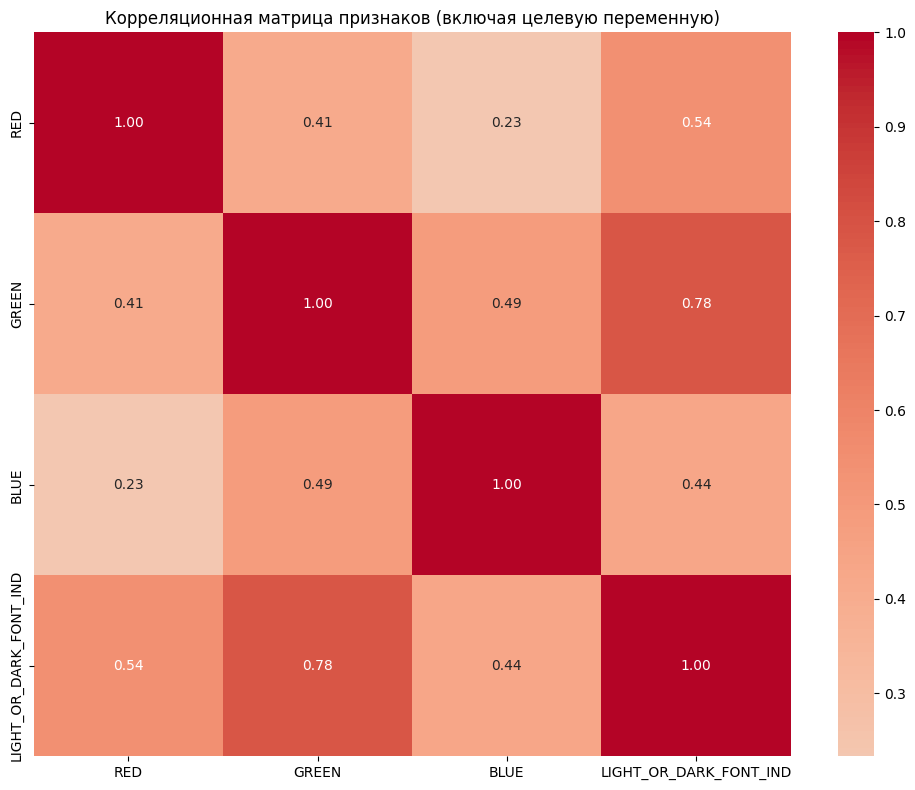

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Проверка на утечку данных — визуальный анализ корреляции признаков с целевой переменной
correlation_matrix = df.corr(numeric_only=True)

# Построение корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Корреляционная матрица признаков (включая целевую переменную)")
plt.tight_layout()
plt.show()

Признак `GREEN` имеет высокую корреляцию с **целевой переменной**: `0.783`

Это может быть **неестественно сильная связь**, особенно если признак не должен прямо указывать на класс.

Проверь, как формировались признаки — возможно, **`GREEN` напрямую отражает метку** (например, как логический флаг).

#### Сильно ли классы различаются?

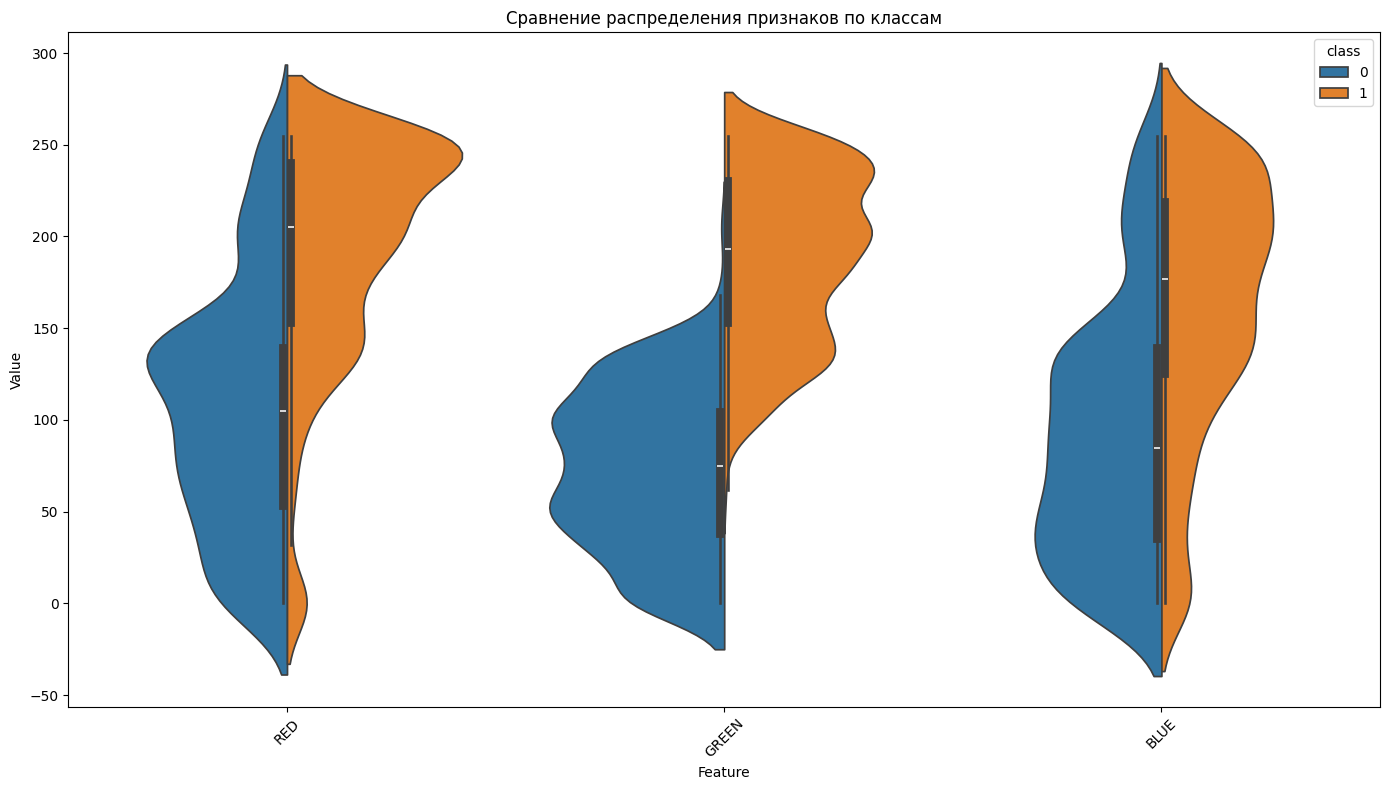

In [ ]:
# Разделим данные по классам для визуального сравнения
class_0 = df[df.iloc[:, -1] == 0]
class_1 = df[df.iloc[:, -1] == 1]

# Построим распределения признаков по классам
df_melted = df.copy()
df_melted['class'] = df_melted.iloc[:, -1]
df_melted = df_melted.drop(columns=df.columns[-1])

df_long = df_melted.melt(id_vars='class', var_name='Feature', value_name='Value')

plt.figure(figsize=(14, 8))
sns.violinplot(x='Feature', y='Value', hue='class', data=df_long, split=True)
plt.title("Сравнение распределения признаков по классам")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

На графике распределений признаков (`violinplot`) видно, что:

Все три признака (`RED`, `GREEN`, `BLUE`) отличаются по классам.

Особенно ярко выражено это у `GREEN` и `RED`.

Это объясняет, почему модель так легко разделяет классы — **признаки действительно очень хорошо разделяют выборки**.

#### Баланс классов

In [18]:
class_distribution = df.iloc[:, -1].value_counts(normalize=True)

print(class_distribution.to_dict())

{1: 0.6193308550185873, 0: 0.38066914498141263}


Это **небольшой дисбаланс**, но не критичный. **Баланс приемлемый**.